In [1]:
import pandas as pd
import numpy as np
import csv
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_squared_error, mean_absolute_error
from scipy.stats import pearsonr
import tensorflow as tf
from tensorflow import keras
import seaborn as sns

In [2]:
data=pd.read_excel("data2(allmax).xlsx")
data.to_csv('data2(allmax).csv',index=True)
data=data.dropna()


In [3]:
data.head()
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59 entries, 0 to 65
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Temperature(max)     59 non-null     float64
 1   D.O. (mg/L)(min)     59 non-null     float64
 2   pH(max)              59 non-null     float64
 3   Conductivity(max)    59 non-null     float64
 4   BOD(max)             59 non-null     float64
 5   Total coliform(max)  59 non-null     float64
dtypes: float64(6)
memory usage: 3.2 KB


Temperature(max)       0
D.O. (mg/L)(min)       0
pH(max)                0
Conductivity(max)      0
BOD(max)               0
Total coliform(max)    0
dtype: int64

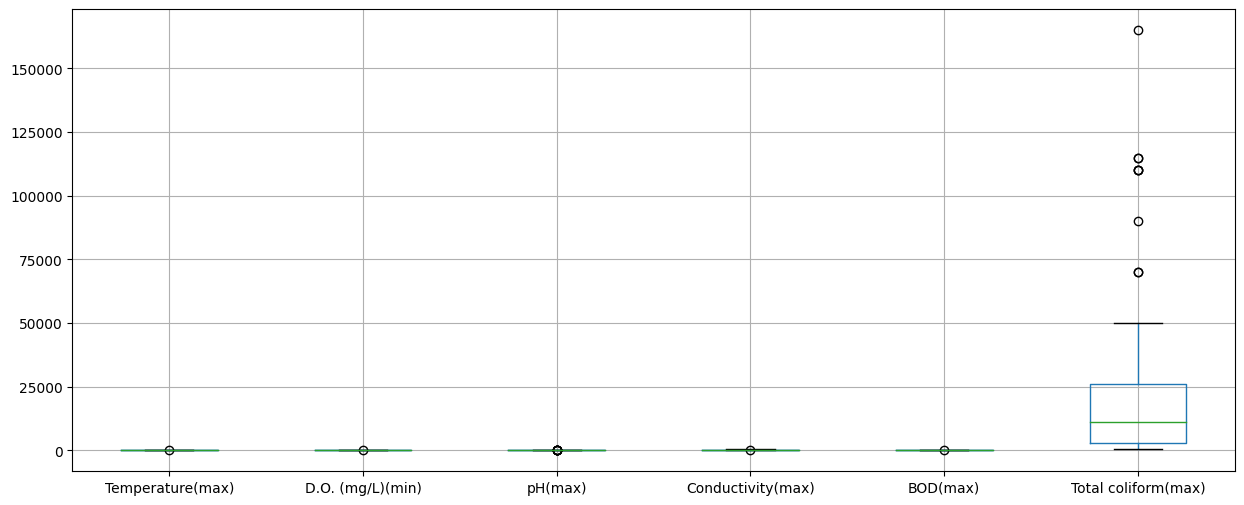

In [4]:
data.boxplot(figsize=(15,6))
plt.show()

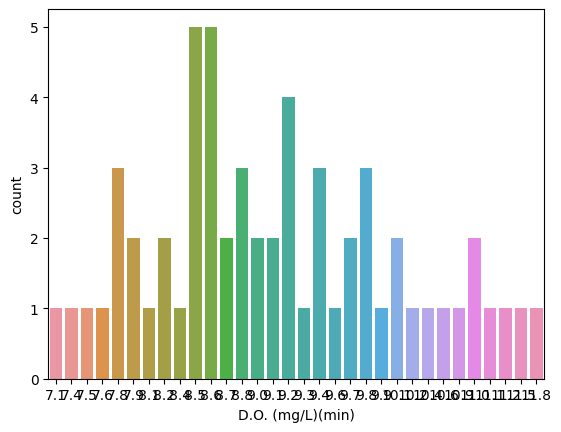

In [5]:
# data["D.O. (mg/l)"].value_counts()
sns.countplot(x=data["D.O. (mg/L)(min)"])
plt.show((15,6))

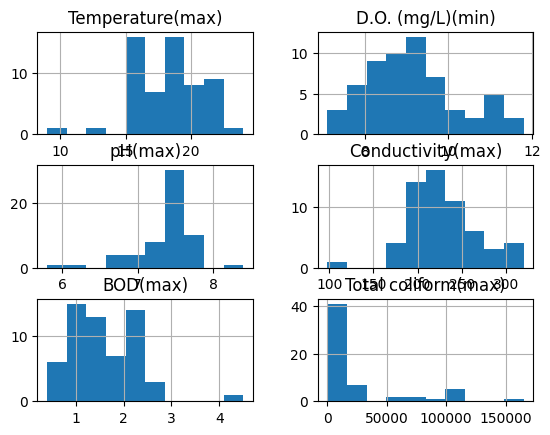

In [6]:
data.hist()
plt.show()

In [7]:
train, test = train_test_split(data,test_size=0.1,random_state=100)
train_features = train.loc[:,data.columns !='D.O. (mg/L)(min)']
test_features = test.loc[:,data.columns !='D.O. (mg/L)(min)']
train_label = train['D.O. (mg/L)(min)']
test_label = test['D.O. (mg/L)(min)']

In [8]:
train_features


,Temperature(max),pH(max),Conductivity(max),BOD(max),Total coliform(max)
56,18.0,7.30,252.0,1.20,70000.0
32,20.0,7.40,230.0,4.50,400.0
6,13.0,7.70,209.0,1.20,3900.0
23,17.0,7.70,279.0,2.40,5000.0
0,17.0,8.40,282.0,2.70,3000.0
43,20.0,7.80,175.0,1.80,30000.0
65,16.0,6.78,231.0,1.05,13000.0
12,15.0,7.30,206.0,2.40,3400.0
5,17.0,7.00,250.0,1.40,2300.0
61,20.0,7.30,217.0,1.00,11000.0


In [9]:
print(train_features.shape)
print(train_label.shape)
print(test_features.shape)
print(test_label.shape)

(53, 5)
(53,)
(6, 5)
(6,)


In [10]:
# scaler=preprocessing.StandardScaler()
# scaler=preprocessing.MaxAbsScaler()
# train_features=scaler.fit_transform(train_features)
# test_features=scaler.fit_transform(test_features)
train_features_new = preprocessing.MinMaxScaler(feature_range=(0, 1)).fit_transform(train_features)
test_features_new = preprocessing.MinMaxScaler(feature_range=(0, 1)).fit_transform(test_features)

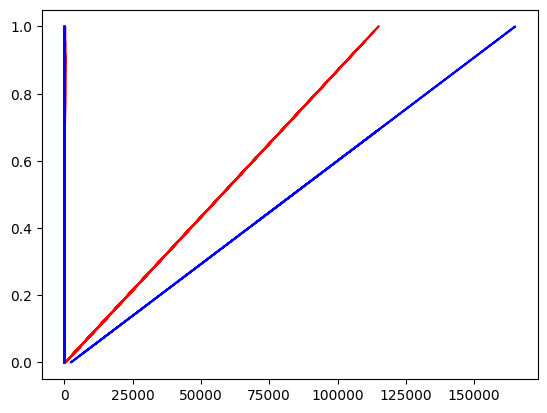

In [11]:
plt.plot(train_features,train_features_new,'red')
plt.plot(test_features,test_features_new,'blue')
plt.show()

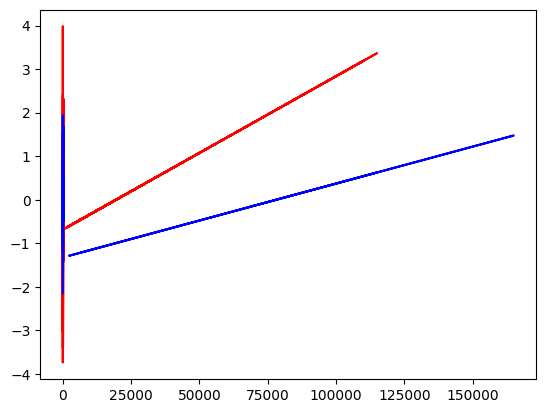

In [12]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
y1_new=scaler.fit_transform(train_features)
y2_new=scaler.fit_transform(test_features)

plt.plot(train_features,y1_new,'red')
plt.plot(test_features,y2_new,'blue')
plt.show()

In [13]:
# ANFIS MODEL CODE
from Models import myanfis

In [14]:
import sys
sys.maxsize

9223372036854775807

In [15]:
param = myanfis.fis_parameters(
    n_input=5,                # no. of Regressors
    n_memb=8,                 # no. of fuzzy memberships
    batch_size=1,            # 16 / 32 / 64 / ...
    memb_func='gaussian',      # 'gaussian' / 'gbellmf'
    optimizer='sgd',          # sgd / adam / ...
    # mse / mae / huber_loss / mean_absolute_percentage_error / ...
    loss='mse',
    n_epochs=150               # 10 / 25 / 50 / 100 / ...
)

In [16]:
fis = myanfis.ANFIS(n_input=param.n_input,
                    n_memb=param.n_memb,
                    batch_size=param.batch_size,
                    memb_func=param.memb_func,
                    name='myanfis'
                    )

# fis = myanfis.ANFIS(n_input=6,
#                     n_memb=3,
#                     batch_size=1,
#                     memb_func='gaussian',
#                     name='myanfis'
#                     )
# compile model
fis.model.compile(optimizer=param.optimizer,
                    loss=param.loss,
                    metrics=['mse'])

In [17]:
histories=[]
history = fis.fit(train_features_new, train_label,
                    epochs=param.n_epochs,
                    batch_size=param.batch_size,
                    validation_data=(test_features_new, test_label)
                    
                    )
histories.append(history)

Epoch 1/150
53/53 [==============================] - 1s 8ms/step - loss: 84.4674 - mse: 84.4674 - val_loss: 71.3038 - val_mse: 71.3038
Epoch 2/150
53/53 [==============================] - 0s 3ms/step - loss: 82.0169 - mse: 82.0169 - val_loss: 68.5350 - val_mse: 68.5350
Epoch 3/150
53/53 [==============================] - 0s 5ms/step - loss: 75.7274 - mse: 75.7274 - val_loss: 57.4276 - val_mse: 57.4276
Epoch 4/150
53/53 [==============================] - 0s 6ms/step - loss: 37.0502 - mse: 37.0502 - val_loss: 7.1904 - val_mse: 7.1904
Epoch 5/150
53/53 [==============================] - 0s 5ms/step - loss: 5.9741 - mse: 5.9741 - val_loss: 2.7615 - val_mse: 2.7615
Epoch 6/150
53/53 [==============================] - 0s 4ms/step - loss: 2.7430 - mse: 2.7430 - val_loss: 3.5299 - val_mse: 3.5299
Epoch 7/150
53/53 [==============================] - 0s 5ms/step - loss: 2.2651 - mse: 2.2651 - val_loss: 2.2609 - val_mse: 2.2609
Epoch 8/150
53/53 [==============================] - 0s 5ms/step - lo

In [18]:
test_pred=fis(test_features_new)

print(test_pred)

6/6 [==============================] - 0s 2ms/step
[[9.2756  ]
 [9.942185]
 [9.81778 ]
 [8.356174]
 [9.87737 ]
 [8.051794]]


In [19]:
print("MAPE: ", round(mean_absolute_percentage_error(test_label,test_pred),2))
print("r2_score:", round(r2_score(test_label,test_pred),2))
print("MAE: ", round(mean_absolute_error(test_label,test_pred),2))
print("MSE: ", round(mean_squared_error(test_label,test_pred),2))


MAPE:  0.09
r2_score: -0.95
MAE:  0.75
MSE:  0.93


In [20]:

# print("MAE:", round(mean_absolute_error(test_label, test_pred),2))
# print("MAPE = ", round(mean_absolute_percentage_error(test_label, test_pred),2))
# print("MSE = ", round(mean_squared_error(test_label, test_pred),2))
# print("R2_score = ", round(r2_score(test_label, test_pred),2))
for i,j in zip(test_label,test_pred):
    print("actual = ",round(i,2), "predicted = ",round(j[0],2))

actual =  8.6 predicted =  9.28
actual =  8.5 predicted =  9.94
actual =  9.9 predicted =  9.82
actual =  8.5 predicted =  8.36
actual =  8.2 predicted =  9.88
actual =  7.6 predicted =  8.05


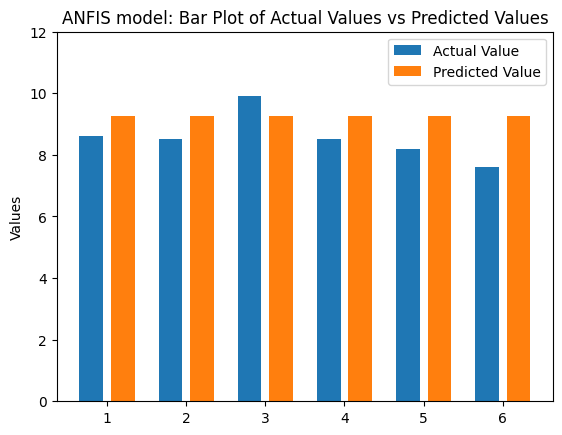

In [21]:
plt.title("ANFIS model: Bar Plot of Actual Values vs Predicted Values")

plt.ylabel("Values")
z = (test_label, test_pred[0])
x = [1,2,3,4,5,6]
base = np.arange(6)
plt.xticks(base, x)
plt.bar(base - 0.2, test_label, 0.3, label = 'Actual Value')
plt.bar(base + 0.2, test_pred[0], 0.3, label = 'Predicted Value')
plt.ylim(top = 12)
plt.legend()
plt.show()